## **Movie Success Prediction **

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import io
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDB-Movie-Data.csv to IMDB-Movie-Data.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['IMDB-Movie-Data.csv']))

In [ ]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,333.13,76.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,126.46,65.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,138.12,62.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,270.32,59.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,325.02,40.0,0.0


## **Data** **Preprocessing**



1.   Handling Missing Data
2.   Handling Categorical Data



In [ ]:
import numpy as np
df.describe(include=np.object)   #get an overview of the values each column contains

,Title,Genre,Description,Director,Actors
count,838,838,838,838,838
unique,837,189,838,524,834
top,The Host,"Action,Adventure,Sci-Fi",Two siblings become increasingly frightened by...,Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ..."
freq,2,50,1,8,2


In [ ]:
df.duplicated().sum()   #checking duplicated entries.

0

In [ ]:
df=df.dropna(axis=0, how='any')

In [ ]:
df.shape

(838, 13)

In [ ]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
Success               0
dtype: int64

In [ ]:
for col_name in df.columns:
  if df[col_name].dtypes == 'object':
    unique_cat = len (df[col_name].unique())
    print("'{col_name}' has {unique_cat} unique categories".format(
        col_name=col_name,unique_cat=unique_cat ))

'Title' has 837 unique categories
'Genre' has 189 unique categories
'Description' has 838 unique categories
'Director' has 524 unique categories
'Actors' has 834 unique categories


In [ ]:
def copy_csv(filename):
    import pandas as pd
    df = pd.read_csv('IMDB-Movie-Data.csv')
    df.to_csv('copy_of_' + 'IMDB-Movie-Data.csv')
copy_csv('IMDB-Movie-Data.csv')

In [ ]:
import csv
L = []
with open("IMDB-Movie-Data (1).csv") as csv_read_file:
    reader = csv.DictReader(csv_read_file)
    
    with open("copy_of_IMDB-Movie-Data.csv", "w") as csv_write_file:
        writer = csv.DictWriter(csv_write_file, fieldnames=["Rank", "Title", "Genre", "Description","Director","Actors","Year","Runtime(Minutes)","Rating","Votes","Revenue(Millions)","Metascore"])
        writer.writeheader()
        for row in df.itertuples():
            # row["Genre"] = str(getattr(row, 'Genre').split(',')[0])
            # print(getattr(row, 'Genre'))
            L.append(str(str(getattr(row, 'Genre')).split(',')[0]))
            # writer.writerow(row)
        i=0
        for row in reader:
            # print(row)
            # writer.writerow(row+","+L[i])
            i+=1

In [ ]:
import os
import csv


def clean(input):
    tmpFile = "Pradnya_1.csv"
    with open(input, "r") as file, open(tmpFile, "w") as outFile:
        reader = csv.reader(file, delimiter=',')
        writer = csv.writer(outFile, delimiter=',')
        header = next(reader)
        writer.writerow(header)
        i = 0
        for row in reader:
            colValues = []
            for col in row:
                colValues.append(col.lower())
            colValues.append(str(L[i]))
            writer.writerow(colValues)
            print(colValues)
            i+=1
    #os.rename(tmpFile, input)
clean('IMDB-Movie-Data.csv')

['1', 'guardians of the galaxy', 'action,adventure,sci-fi', 'a group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.', 'james gunn', 'chris pratt, vin diesel, bradley cooper, zoe saldana', '2014', '121', '8.1', '757074', '333.13', '76', '1', 'Action']
['2', 'prometheus', 'adventure,mystery,sci-fi', 'following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.', 'ridley scott', 'noomi rapace, logan marshall-green, michael fassbender, charlize theron', '2012', '124', '7', '485820', '126.46', '65', '1', 'Adventure']
['3', 'split', 'horror,thriller', 'three girls are kidnapped by a man with a diagnosed 23 distinct personalities. they must try to escape before the apparent emergence of a frightful new 24th.', 'm. night shyamalan', 'james mcavoy, anya taylor-joy, haley lu richardson, jessica sula', '2016', '117', '7.3', '157606', '138.12', '62', '0', 'Hor

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving New_Data.csv to New_Data.csv


In [ ]:
df1 = pd.read_csv(io.BytesIO(uploaded['New_Data.csv']))
df1.head()

,Rank,Title,Genre,Description,Actor1,Actor2,Actor3,Actor4,Director,Genre2,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Success
0,1.0,guardians of the galaxy,"action,adventure,sci-fi",a group of intergalactic criminals are forced ...,chris pratt,vin diesel,bradley cooper,zoe saldana,james gunn,Action,2014.0,121.0,8.1,757074.0,333.13,76.0,1.0
1,2.0,prometheus,"adventure,mystery,sci-fi","following clues to the origin of mankind, a te...",noomi rapace,logan marshall-green,michael fassbender,charlize theron,ridley scott,Adventure,2012.0,124.0,7.0,485820.0,126.46,65.0,1.0
2,3.0,split,"horror,thriller",three girls are kidnapped by a man with a diag...,james mcavoy,anya taylor-joy,haley lu richardson,jessica sula,m. night shyamalan,Horror,2016.0,117.0,7.3,157606.0,138.12,62.0,0.0
3,4.0,sing,"animation,comedy,family","in a city of humanoid animals, a hustling thea...",matthew mcconaughey,reese witherspoon,seth macfarlane,scarlett johansson,christophe lourdelet,Animation,2016.0,108.0,7.2,60545.0,270.32,59.0,0.0
4,5.0,suicide squad,"action,adventure,fantasy",a secret government agency recruits some of th...,will smith,jared leto,margot robbie,viola davis,david ayer,Action,2016.0,123.0,6.2,393727.0,325.02,40.0,0.0


In [ ]:
df1=df1.dropna(axis=0, how='any')

In [ ]:
print(df1['Success'].value_counts())

0.0    688
1.0    149
Name: Success, dtype: int64


In [ ]:
X = df1.iloc[:, :-1].values # attributes to determine dependent variable / Class
print(X)

[[1.0 'guardians of the galaxy' 'action,adventure,sci-fi' ... 757074.0
  333.13 76.0]
 [2.0 'prometheus' 'adventure,mystery,sci-fi' ... 485820.0 126.46 65.0]
 [3.0 'split' 'horror,thriller' ... 157606.0 138.12 62.0]
 ...
 [997.0 'hostel: part ii' 'horror' ... 73152.0 17.54 46.0]
 [998.0 'step up 2: the streets' 'drama,music,romance' ... 70699.0 58.01
  50.0]
 [1000.0 'nine lives' 'comedy,family,fantasy' ... 12435.0 19.64 11.0]]


In [ ]:
Y = df1.iloc[:, -1].values # dependent variable / Class
print(Y)

[1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.

In [ ]:
dummy = {"Genre2": {"Action": 1, "Adventure": 2 , "Animation": 3 ,"Biography": 4, "Comedy": 5,"Drama":6,"Horror":7,"Crime":8,"Family":9,"Fantasy":10,"History":11,"Music":12,"Musical":13,"Mystery":14,"Romance":15,"Sci-Fi":16,"Sport":17,"Thriller":18,"War":19,"Western":20}}
df1.replace(dummy, inplace=True)
df1.head()

,Rank,Title,Genre,Description,Actor1,Actor2,Actor3,Actor4,Director,Genre2,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Success
0,1.0,guardians of the galaxy,"action,adventure,sci-fi",a group of intergalactic criminals are forced ...,chris pratt,vin diesel,bradley cooper,zoe saldana,james gunn,1,2014.0,121.0,8.1,757074.0,333.13,76.0,1.0
1,2.0,prometheus,"adventure,mystery,sci-fi","following clues to the origin of mankind, a te...",noomi rapace,logan marshall-green,michael fassbender,charlize theron,ridley scott,2,2012.0,124.0,7.0,485820.0,126.46,65.0,1.0
2,3.0,split,"horror,thriller",three girls are kidnapped by a man with a diag...,james mcavoy,anya taylor-joy,haley lu richardson,jessica sula,m. night shyamalan,7,2016.0,117.0,7.3,157606.0,138.12,62.0,0.0
3,4.0,sing,"animation,comedy,family","in a city of humanoid animals, a hustling thea...",matthew mcconaughey,reese witherspoon,seth macfarlane,scarlett johansson,christophe lourdelet,3,2016.0,108.0,7.2,60545.0,270.32,59.0,0.0
4,5.0,suicide squad,"action,adventure,fantasy",a secret government agency recruits some of th...,will smith,jared leto,margot robbie,viola davis,david ayer,1,2016.0,123.0,6.2,393727.0,325.02,40.0,0.0


In [ ]:
df1["Actor1"] = df1["Actor1"].astype('category')
df1["Actor2"] = df1["Actor2"].astype('category')
df1["Actor3"] = df1["Actor3"].astype('category')
df1["Actor4"] = df1["Actor4"].astype('category')
df1["Director"] = df1["Director"].astype('category')

df1.dtypes

Rank                   float64
Title                   object
Genre                   object
Description             object
Actor1                category
Actor2                category
Actor3                category
Actor4                category
Director              category
Genre2                   int64
Year                   float64
Runtime (Minutes)      float64
Rating                 float64
Votes                  float64
Revenue (Millions)     float64
Metascore              float64
Success                float64
dtype: object

In [ ]:
df1["Actor1_cat"] = df1["Actor1"].cat.codes
df1["Actor2_cat"] = df1["Actor2"].cat.codes
df1["Actor3_cat"] = df1["Actor3"].cat.codes
df1["Actor4_cat"] = df1["Actor4"].cat.codes
df1["Director_cat"] = df1["Director"].cat.codes
df1.head()

,Rank,Title,Genre,Description,Actor1,Actor2,Actor3,Actor4,Director,Genre2,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Success,Actor1_cat,Actor2_cat,Actor3_cat,Actor4_cat,Director_cat
0,1.0,guardians of the galaxy,"action,adventure,sci-fi",a group of intergalactic criminals are forced ...,chris pratt,vin diesel,bradley cooper,zoe saldana,james gunn,1,2014.0,121.0,8.1,757074.0,333.13,76.0,1.0,75,555,82,516,208
1,2.0,prometheus,"adventure,mystery,sci-fi","following clues to the origin of mankind, a te...",noomi rapace,logan marshall-green,michael fassbender,charlize theron,ridley scott,2,2012.0,124.0,7.0,485820.0,126.46,65.0,1.0,323,343,420,90,417
2,3.0,split,"horror,thriller",three girls are kidnapped by a man with a diag...,james mcavoy,anya taylor-joy,haley lu richardson,jessica sula,m. night shyamalan,7,2016.0,117.0,7.3,157606.0,138.12,62.0,0.0,183,43,227,245,317
3,4.0,sing,"animation,comedy,family","in a city of humanoid animals, a hustling thea...",matthew mcconaughey,reese witherspoon,seth macfarlane,scarlett johansson,christophe lourdelet,3,2016.0,108.0,7.2,60545.0,270.32,59.0,0.0,288,577,548,449,85
4,5.0,suicide squad,"action,adventure,fantasy",a secret government agency recruits some of th...,will smith,jared leto,margot robbie,viola davis,david ayer,1,2016.0,123.0,6.2,393727.0,325.02,40.0,0.0,422,230,389,502,109


In [ ]:
df1= df1[['Rank','Title','Genre','Description','Director','Actor1','Actor2','Actor3','Actor4','Actor1_cat','Actor2_cat','Actor3_cat','Actor4_cat','Director_cat' ,'Genre2', 'Year', 'Runtime (Minutes)',
       'Rating', 'Votes', 'Revenue (Millions)', 'Metascore','Success']]

In [ ]:
df1.head()

,Rank,Title,Genre,Description,Director,Actor1,Actor2,Actor3,Actor4,Actor1_cat,Actor2_cat,Actor3_cat,Actor4_cat,Director_cat,Genre2,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Success
0,1.0,guardians of the galaxy,"action,adventure,sci-fi",a group of intergalactic criminals are forced ...,james gunn,chris pratt,vin diesel,bradley cooper,zoe saldana,75,555,82,516,208,1,2014.0,121.0,8.1,757074.0,333.13,76.0,1.0
1,2.0,prometheus,"adventure,mystery,sci-fi","following clues to the origin of mankind, a te...",ridley scott,noomi rapace,logan marshall-green,michael fassbender,charlize theron,323,343,420,90,417,2,2012.0,124.0,7.0,485820.0,126.46,65.0,1.0
2,3.0,split,"horror,thriller",three girls are kidnapped by a man with a diag...,m. night shyamalan,james mcavoy,anya taylor-joy,haley lu richardson,jessica sula,183,43,227,245,317,7,2016.0,117.0,7.3,157606.0,138.12,62.0,0.0
3,4.0,sing,"animation,comedy,family","in a city of humanoid animals, a hustling thea...",christophe lourdelet,matthew mcconaughey,reese witherspoon,seth macfarlane,scarlett johansson,288,577,548,449,85,3,2016.0,108.0,7.2,60545.0,270.32,59.0,0.0
4,5.0,suicide squad,"action,adventure,fantasy",a secret government agency recruits some of th...,david ayer,will smith,jared leto,margot robbie,viola davis,422,230,389,502,109,1,2016.0,123.0,6.2,393727.0,325.02,40.0,0.0


In [ ]:
print(df1.columns[9:21])

Index(['Actor1_cat', 'Actor2_cat', 'Actor3_cat', 'Actor4_cat', 'Director_cat',
       'Genre2', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes',
       'Revenue (Millions)', 'Metascore'],
      dtype='object')


In [ ]:
df1=df1.dropna(axis=0, how='any')

Splitting data for training and testing

In [ ]:
trainx,testx,trainy,testy=train_test_split(df1[df1.columns[9:21]],df1.iloc[:,-1],test_size=0.25,random_state=0)
s=StandardScaler()
trainx=s.fit_transform(trainx)
testx=s.transform(testx)

Model Performance

KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
Knn_pred = knn.fit(trainx, trainy).predict(testx)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(testy,Knn_pred)
print('Confusion Matrix is :',confusion_mat)

Confusion Matrix is : [[171   3]
 [ 13  23]]


In [ ]:
print("Train Score:",knn.score(trainx, trainy))
print("Test Score:",knn.score(testx, testy))

Train Score: 0.9393939393939394
Test Score: 0.9238095238095239


In [ ]:
accuracy=accuracy_score(testy,Knn_pred)
print('Accuracy:',accuracy)

Accuracy: 0.9238095238095239


In [ ]:
from sklearn.metrics import precision_score
precision=precision_score(testy,Knn_pred)
print('Precision:',precision)


Precision: 0.8846153846153846


In [ ]:
from sklearn.metrics import recall_score
recall=recall_score(testy,Knn_pred)
print('Recall: ',recall)

Recall:  0.6388888888888888


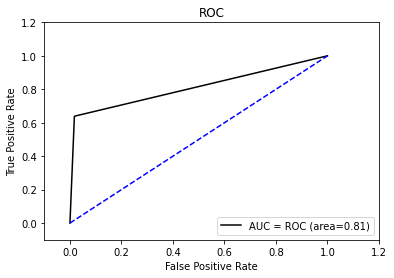

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresh=roc_curve(testy, Knn_pred)
auc=auc(fpr, tpr)
plt.title('ROC')
plt.plot(fpr, tpr, 'k',label='AUC = ROC (area=%0.2f)'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr_pred=Lr.fit(trainx, trainy).predict(testx)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(testy,Lr_pred)
print('Confusion Matrix is :',confusion_mat)

Confusion Matrix is : [[167   7]
 [  8  28]]


In [ ]:
print("Train Score:",Lr.score(trainx, trainy))
print("Test Score:",Lr.score(testx, testy))

Train Score: 0.937799043062201
Test Score: 0.9285714285714286


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(testy,Lr_pred)
print('Accuracy:',accuracy)

Accuracy: 0.9285714285714286


In [ ]:
from sklearn.metrics import precision_score
precision=precision_score(testy,Lr_pred)
print('Precision:',precision)

Precision: 0.8


In [ ]:
from sklearn.metrics import recall_score
recall=recall_score(testy,Lr_pred)
print('Recall: ',recall)

Recall:  0.7777777777777778


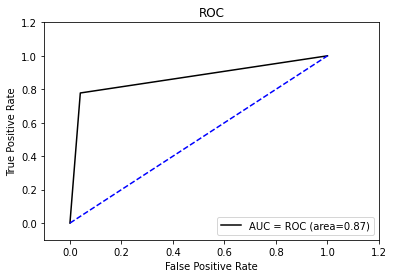

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresh=roc_curve(testy, Lr_pred)
auc=auc(fpr, tpr)
plt.title('ROC')
plt.plot(fpr, tpr, 'k',label='AUC = ROC (area=%0.2f)'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SVM

In [ ]:
from sklearn import svm
s=svm.SVC()
svm_pred=s.fit(trainx,trainy).predict(testx)

In [ ]:
confusion_mat=confusion_matrix(testy,svm_pred)
print('Confusion Matrix is :',confusion_mat)

Confusion Matrix is : [[172   2]
 [  9  27]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(testy,svm_pred)
print('Accuracy:',accuracy)

Accuracy: 0.9476190476190476


In [ ]:
from sklearn.metrics import precision_score
precision=precision_score(testy,svm_pred)
print('Precision:',precision)

Precision: 0.9310344827586207


In [ ]:
from sklearn.metrics import recall_score
recall=recall_score(testy,svm_pred)
print('Recall: ',recall)

Recall:  0.75


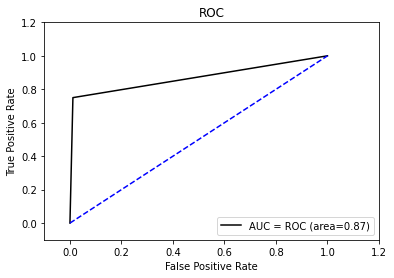

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresh=roc_curve(testy, svm_pred)
auc=auc(fpr, tpr)
plt.title('ROC')
plt.plot(fpr, tpr, 'k',label='AUC = ROC (area=%0.2f)'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
NB_pred=naive.fit(trainx,trainy).predict(testx)

In [ ]:
confusion_mat=confusion_matrix(testy,NB_pred)
print('Confusion Matrix is :',confusion_mat)

Confusion Matrix is : [[158  16]
 [  7  29]]


In [ ]:
print("Train Score:",naive.score(trainx, trainy))
print("Test Score:",naive.score(testx, testy))

Train Score: 0.9186602870813397
Test Score: 0.8904761904761904


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(testy,NB_pred)
print('Accuracy:',accuracy)

Accuracy: 0.8904761904761904


In [ ]:
from sklearn.metrics import precision_score
precision=precision_score(testy,NB_pred)
print('Precision:',precision)

Precision: 0.6444444444444445


In [ ]:
from sklearn.metrics import recall_score
recall=recall_score(testy,NB_pred)
print('Recall: ',recall)

Recall:  0.8055555555555556


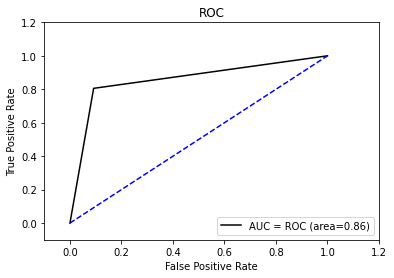

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresh=roc_curve(testy, NB_pred)
auc=auc(fpr, tpr)
plt.title('ROC')
plt.plot(fpr, tpr, 'k',label='AUC = ROC (area=%0.2f)'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Success Prediction

In [ ]:
import pickle
pickle.dump(Lr,open('movies.pkl','wb'))
model=pickle.load(open('movies.pkl','rb'))


In [ ]:
print("Success or failure ? ->",model.predict([[75,43,389,245,85,7,2020, 121, 7.6, 157666, 270, 78]]))

Success or failure ? -> [1.]


In [ ]:
print("Success or failure ? ->",model.predict([[183,43,227,245,317,7,2016, 117, 4.3, 157, 138, 6]]))

Success or failure ? -> [0.]
